In [3]:
# Data manipulation
import numpy as np
import pandas as pd
from string import ascii_lowercase

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Kaplan-Meier curve
from lifelines import KaplanMeierFitter 
from sksurv.nonparametric import kaplan_meier_estimator

In [4]:
# Create a toy dataframe
df = pd.DataFrame(data={'duration': [3,9,5,8,7,2,1,3,4],
                        'event': [1,0,1,0,1,0,1,0,0]}, 
                  index=list(ascii_lowercase[:9]))

df2 = pd.DataFrame(data={'duration': [2,10,4,9,8,1,2,4,5], 
                        'event': [1,0,1,0,1,0,1,0,0]}, 
                        index=list(ascii_lowercase[:9]))

# Prepare unique durations in ascending order
durations = df.sort_values('duration')['duration'].unique()
durations

# Initialise the table
columns = ['duration', 'n_at_risk', 'n_events', 
           'survival_probability']

km = pd.DataFrame(columns=columns, dtype=np.number)
km2 = pd.DataFrame(columns=columns, dtype=np.number)

# count_row = df.shape[0]  # gives number of row count
# count_col = df.shape[1]  # gives number of col count
# count_dimension = df.shape()
km = km.append(pd.DataFrame([[0, df.shape[0], 0, 1]], 
                            columns=columns))
km2 = km2.append(pd.DataFrame([[0, df.shape[0], 0, 1]], 
                            columns=columns))

# Calculate survival probability for each duration
for i, t in enumerate(durations):
    n = np.sum(df['duration']>=t)
    d = np.sum((df['duration']==t) & (df['event']==1))
    s = (1 - d / n) * km.loc[i, 'survival_probability']
    km = km.append(pd.DataFrame([[t, n, d, s]], 
                                index=[i+1],
                                columns=columns))
    km2 = km2.append(pd.DataFrame([[t, n, d, s]], 
                                index=[i+1],
                                columns=columns))                            
km2

,duration,n_at_risk,n_events,survival_probability
0,0.0,9.0,0.0,1.000000
1,1.0,9.0,1.0,0.888889
2,2.0,8.0,0.0,0.888889
3,3.0,7.0,1.0,0.761905
4,4.0,5.0,0.0,0.761905
5,5.0,4.0,1.0,0.571429
6,7.0,3.0,1.0,0.380952
7,8.0,2.0,0.0,0.380952
8,9.0,1.0,0.0,0.380952


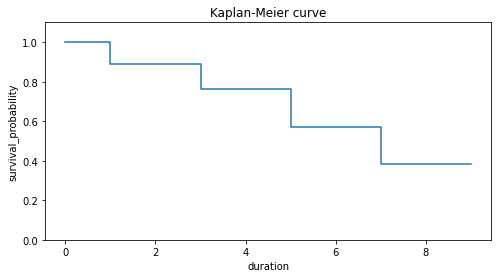

In [3]:
plt.figure(figsize=(8,4))
sns.lineplot(data=km, x='duration', y='survival_probability', 
             drawstyle='steps-post')
plt.ylim(0,1.1) 
plt.title("Kaplan-Meier curve");

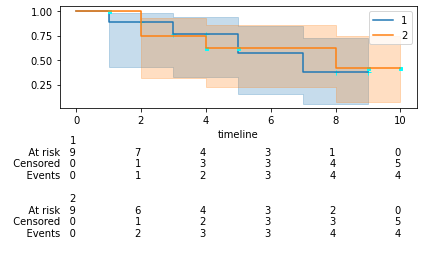

In [26]:
# using lifeline and multiple group
ax = plt.subplot(111)
kmf1 = KaplanMeierFitter() 
dur = df['duration']
evet = df['event']
ax = kmf1.fit(dur,evet,label='1').plot_survival_function(ax=ax, show_censors=True, censor_styles={'ms': 5, 'marker': '+','mfc':'cyan','mec':'cyan'})



kmf2 = KaplanMeierFitter() 
dur2 = df2['duration']
evet2 = df2['event']
ax = kmf2.fit(dur2,evet2,label='2').plot_survival_function(ax=ax, show_censors=True, censor_styles={'ms': 3, 'marker': 's', 'mfc':'cyan','mec':'cyan'}) # matplotlib markers


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2,ax=ax,fig=fig)
plt.tight_layout()

# print(kmf.event_table)

# plt.figure(figsize=(8,4))
# kmf.plot()
# plt.title("Kaplan-Meier curve");



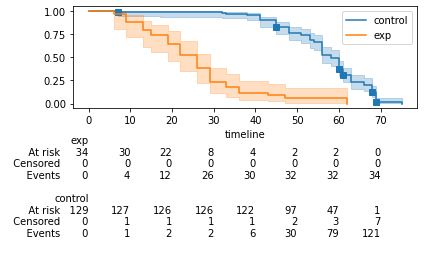

In [10]:
# multi group
from lifelines.datasets import load_waltons
waltons = load_waltons()
T = waltons['T']
E = waltons['E']
waltons = load_waltons()
ix = waltons['group'] == 'control'

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(waltons.loc[ix]['T'], waltons.loc[ix]['E'], label='control').plot_survival_function(ax=ax, show_censors=True, censor_styles={'ms': 6, 'marker': 's'})

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(waltons.loc[~ix]['T'], waltons.loc[~ix]['E'], label='exp').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)
plt.tight_layout()